In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("breast-cancer-wisconsin.data",header=None)
df.columns = ['SampleCodeNumber','ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']

In [575]:
len(df)

699

In [576]:
df.head()

,SampleCodeNumber,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [577]:
df_original = df
for col in df_original.columns:
    df_original = df_original[df_original[col] != '?']
len(df_original)

683

In [578]:
df_modified = df
for col in df_modified.columns:
    df_modified[col].replace({'?':'1'}, inplace=True)
len(df_modified)

699

In [579]:
def logisticRegression(dfIn) :
    X = np.asarray(dfIn[['ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion'
                         ,'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']])
    Y = np.asarray(dfIn[['Class']])
    Y = Y.ravel()
    X = preprocessing.StandardScaler().fit(X).transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
    Y_predict = LR.predict(X_test)
    cm = metrics.confusion_matrix(Y_test,Y_predict)
    plt.figure(figsize=(8,4))
    plt.title("Confusion Matrix")
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["2","4"], yticklabels=["2","4"])
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    return metrics.accuracy_score(Y_test, Y_predict)

Original LogisticRegression's Accuracy:  0.9710144927536232


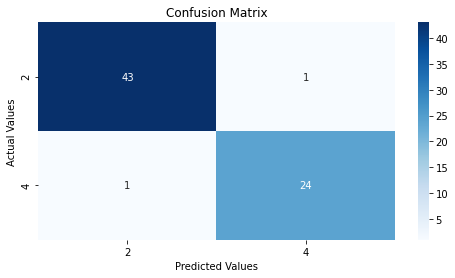

In [580]:
print("Original LogisticRegression's Accuracy: ", logisticRegression(df_original))

Modified LogisticRegression's Accuracy:  0.9285714285714286


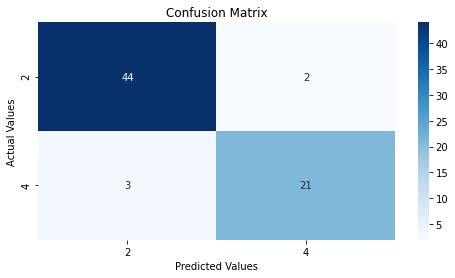

In [581]:
print("Modified LogisticRegression's Accuracy: ", logisticRegression(df_modified))